<a href="https://colab.research.google.com/github/mukhammadarifin/PCVK_Genap_2021/blob/main/Minggu_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TUGAS PRAKTIKUM

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab 
terhubung dengan Github Anda, buat notebook baru dan beri nama “Week10.ipynb”. 
Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum 
minggu ke-6 berikut.

3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV) secara 
manual sesuai dengan deskripsi dari grafik yang ditunjukkan di atas. 


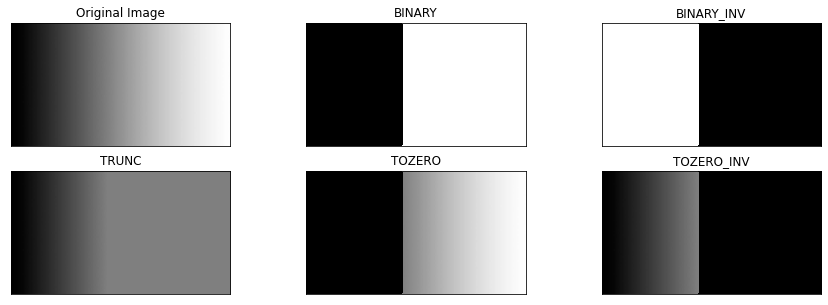

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

filename = ('/content/drive/MyDrive/image/gradient.jpg')
img = cv2.imread(filename) 
thresh1 = cv2.imread(filename) 
thresh2 = cv2.imread(filename) 
thresh3 = cv2.imread(filename) 
thresh4 = cv2.imread(filename) 
thresh5 = cv2.imread(filename) 
thresh = 127    #nilai Threshold yang ditentukan

#1. threshi jika pixel di img>127, maka threshi bernilai 1(putih) selain itu bernilai 0 (hitam) 
thresh1[img>thresh] = 255           #tanpa library 
thresh1[img<=thresh] = 0

#2. thresh2 adalah binary threshold inverse 
thresh2 = 255 - thresh1             #tanpa library

#3. Threshold Truncate 
thresh3[img>thresh] = thresh        #tanpa library

#4. Threshold Tozero 
thresh4[img<=thresh] = 0            #tanpa library

#5. Threshold Tozero Inverse 
thresh5[img>thresh] = 0             #tanpa library

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV'] 
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]


plt.figure(figsize = (15,5)) 
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest') 
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([]) 
plt.show()

(<matplotlib.axes._subplots.AxesSubplot at 0x7f3c9a466f90>,
 <matplotlib.image.AxesImage at 0x7f3c9a3d6d10>)

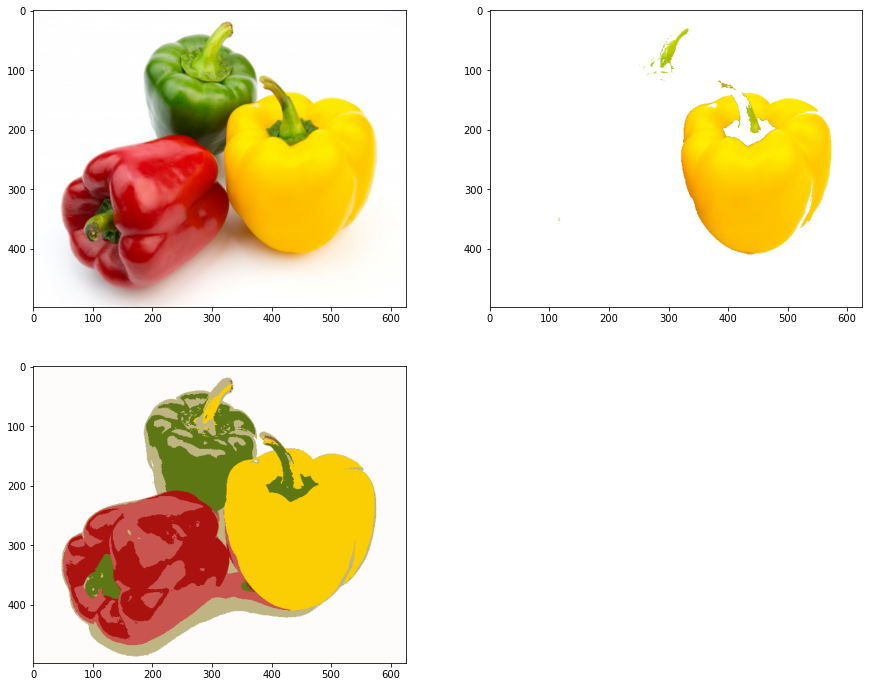

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

filename = ('/content/drive/MyDrive/image/peppers.jpg')

img = cv2.imread(filename) 
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)


pixel_values = img.reshape((-1, 3)) 

pixel_values = np.float32(pixel_values)

#syarat berhenti iterasi dr KMeans adalah jika centroid sudah tidak terlalu banyak pergeseran posisi antara interasi sekarang dengan iterasi sebelumnya (konvergen). Karena jumlah data yang besar, maka kita akan hentikan iterasi saat jumlah iterasi = 100 atau epsilon(selisih antara posisi centroid skrg dgn posisi centroid di iterasi sebelumnya) <0.2

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

#jika diperhatikan pada image asli, terdapat 3 warna utama (hijau, biru, dan putih/orange). untuk percobaan ini kita akan gunakan 3 cluster untuk image ini

k = 6 
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

#konversi titik centroid kedalam integer 
centers = np.uint8(centers)

#flattening label array 
labels = labels.flatten()

#konversi warna pixel asli kewarna dari tiap centroidnya 
segmented_image = centers[labels.flatten()] 
# reshape ke bentuk image asli 
segmented_image = segmented_image.reshape(img.shape)

masked_image = np.copy(img) 
masked_image0= masked_image.reshape((-1, 3)) 
masked_image0[labels != 1] = [255, 255, 255]
masked_image0 = masked_image0.reshape(img.shape)


plt.figure(figsize = (15,12)) 
plt.subplot(2,2,1),plt.imshow(img) 
plt.subplot(2,2,2),plt.imshow(masked_image0) 
plt.subplot(2,2,3),plt.imshow(segmented_image)
